<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.555369  87.808420  65.904061 -0.132900  235.134951   
      1.0    34.422192  81.004175  40.647732  0.169017  166.243116   
      2.0    81.324892  87.050180  50.076621  0.146199  228.597891   
      3.0    50.475749  56.265269  68.926674 -0.388218  185.279474   
      4.0    23.596257  91.826638  60.278796  0.914389  186.616079   
...                ...        ...        ...       ...         ...   
999.0 245.0  71.165451  88.330535  72.565990 -0.886738  241.175238   
      246.0  80.815637  50.034602  97.446109 -1.002221  237.294127   
      247.0  30.254620  75.687974  45.996855  0.928605  162.868054   
      248.0  47.540176  79.952080  91.693099  0.102821  229.288176   
      249.0  74.782903  78.907218  85.540689  0.398929  249.629739   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.255477 -0.120527  
      1.0    166.072746  0.170370  
      2.0    228.440605  0.157285  
      3.0    185.671404 -0.391930  
      4.0    185.694228  0.921851  
...                 ...       ...  
999.0 245.0  242.074437 -0.899199  
      246.0  238.155754 -0.861627  
      247.0  161.990418  0.877636  
      248.0  229.178607  0.109569  
      249.0  249.196587  0.433152  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.555369  87.808420  65.904061 -0.132900  235.134951   
      1.0    34.422192  81.004175  40.647732  0.169017  166.243116   
      2.0    81.324892  87.050180  50.076621  0.146199  228.597891   
      3.0    50.475749  56.265269  68.926674 -0.388218  185.279474   
      4.0    23.596257  91.826638  60.278796  0.914389  186.616079   
...                ...        ...        ...       ...         ...   
999.0 245.0  71.165451  88.330535  72.565990 -0.886738  241.175238   
      246.0  80.815637  50.034602  97.446109 -1.002221  237.294127   
      247.0  30.254620  75.687974  45.996855  0.928605  162.868054   
      248.0  47.540176  79.952080  91.693099  0.102821  229.288176   
      249.0  74.782903  78.907218  85.540689  0.398929  249.629739   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.255477 -0.120527  
      1.0    166.072746  0.170370  
      2.0    228.440605  0.157285  
      3.0    185.671404 -0.391930  
      4.0    185.694228  0.921851  
...                 ...       ...  
999.0 245.0  242.074437 -0.899199  
      246.0  238.155754 -0.861627  
      247.0  161.990418  0.877636  
      248.0  229.178607  0.109569  
      249.0  249.196587  0.433152  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.555369,87.808420,65.904061,-0.132900,235.134951,235.255477,-0.120527
1,0.0,1.0,34.422192,81.004175,40.647732,0.169017,166.243116,166.072746,0.170370
2,0.0,2.0,81.324892,87.050180,50.076621,0.146199,228.597891,228.440605,0.157285
3,0.0,3.0,50.475749,56.265269,68.926674,-0.388218,185.279474,185.671404,-0.391930
4,0.0,4.0,23.596257,91.826638,60.278796,0.914389,186.616079,185.694228,0.921851
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,71.165451,88.330535,72.565990,-0.886738,241.175238,242.074437,-0.899199
249996,999.0,246.0,80.815637,50.034602,97.446109,-1.002221,237.294127,238.155754,-0.861627
249997,999.0,247.0,30.254620,75.687974,45.996855,0.928605,162.868054,161.990418,0.877636
249998,999.0,248.0,47.540176,79.952080,91.693099,0.102821,229.288176,229.178607,0.109569


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.555369  87.808420  65.904061 -0.132900  235.134951   
      1.0    34.422192  81.004175  40.647732  0.169017  166.243116   
      2.0    81.324892  87.050180  50.076621  0.146199  228.597891   
      3.0    50.475749  56.265269  68.926674 -0.388218  185.279474   
      4.0    23.596257  91.826638  60.278796  0.914389  186.616079   
...                ...        ...        ...       ...         ...   
999.0 245.0  71.165451  88.330535  72.565990 -0.886738  241.175238   
      246.0  80.815637  50.034602  97.446109 -1.002221  237.294127   
      247.0  30.254620  75.687974  45.996855  0.928605  162.868054   
      248.0  47.540176  79.952080  91.693099  0.102821  229.288176   
      249.0  74.782903  78.907218  85.540689  0.398929  249.629739   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.255477 -0.120527  
      1.0    166.072746  0.170370  
      2.0    228.440605  0.157285  
      3.0    185.671404 -0.391930  
      4.0    185.694228  0.921851  
...                 ...       ...  
999.0 245.0  242.074437 -0.899199  
      246.0  238.155754 -0.861627  
      247.0  161.990418  0.877636  
      248.0  229.178607  0.109569  
      249.0  249.196587  0.433152  

[250000 rows x 7 columns]

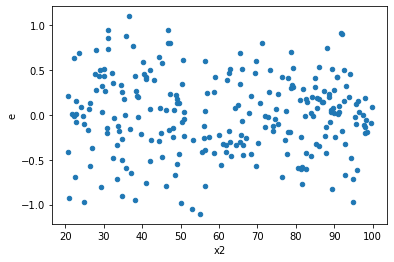

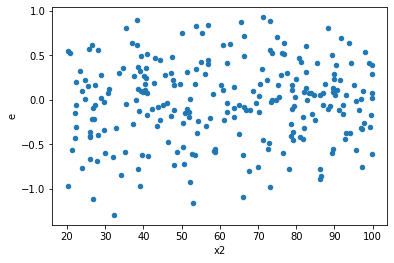

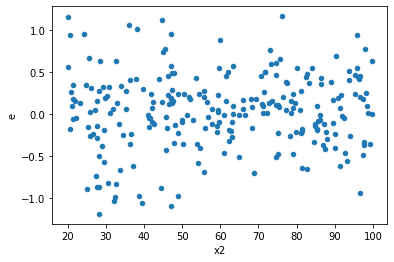

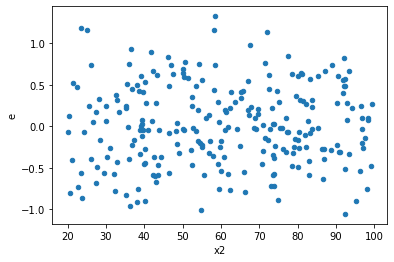

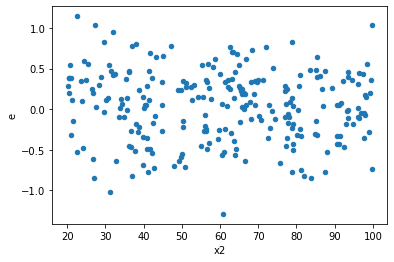

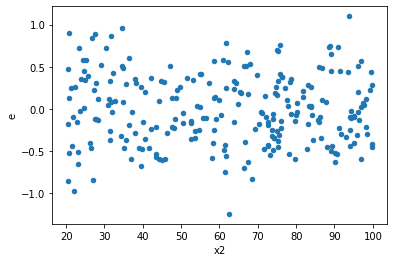

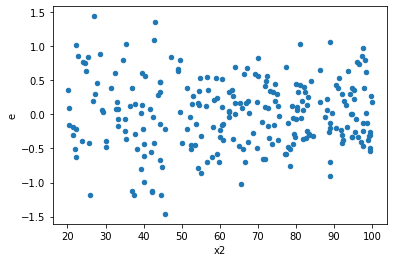

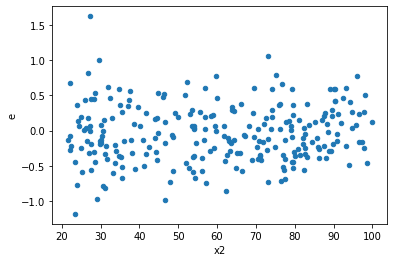

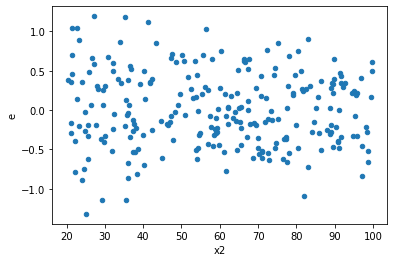

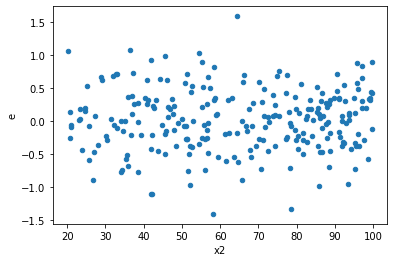

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
11.0,97.0,97.0,18.44539449824245,21.13425259970929,0.19015870616744793,0.21787889278050812,1.1457739546705301,0.5040466312345284,0.7479766843827358,0.2520233156172642,Reject001=1 : Homoscedasticity
14.0,97.0,97.0,22.191809980779432,22.422795134233905,0.2287815461936024,0.2311628364354011,1.0104085765719215,0.9594370664084817,0.5202814667957592,0.47971853320424085,Reject001=1 : Homoscedasticity
15.0,97.0,97.0,18.946282001836735,21.053455352285862,0.19532249486429623,0.21704593146686457,1.111218303952451,0.6045565784745679,0.697721710762716,0.30227828923728395,Reject001=1 : Homoscedasticity
17.0,97.0,97.0,16.073712806639705,17.84757536606918,0.16570837944989386,0.1839956223306101,1.1103579851630003,0.607211786514152,0.696394106742924,0.303605893257076,Reject001=1 : Homoscedasticity
33.0,97.0,97.0,21.599305878550066,22.496718601268448,0.22267325647989758,0.23192493403369535,1.0415482204735844,0.8415258199765905,0.5792370900117048,0.42076290998829524,Reject001=1 : Homoscedasticity
37.0,97.0,97.0,21.59895452568375,23.34594516635423,0.22266963428539951,0.2406798470758168,1.0808831111984192,0.7024759432292025,0.6487620283853988,0.35123797161460124,Reject001=1 : Homoscedasticity
53.0,97.0,97.0,17.598015801880905,19.002994251987868,0.18142284331835984,0.19590715723698834,1.07983732177106,0.7060045199446052,0.6469977400276974,0.3530022599723026,Reject001=1 : Homoscedasticity
59.0,97.0,97.0,15.845495981610291,17.775109064950602,0.16335562867639475,0.1832485470613464,1.121776755084205,0.5725679478752905,0.7137160260623547,0.28628397393764526,Reject001=1 : Homoscedasticity
60.0,97.0,97.0,18.837906539957363,19.196077006456232,0.1942052220614161,0.19789770109748692,1.0190132839728845,0.9262919180523421,0.5368540409738289,0.46314595902617106,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,19.25340595438633,15.380974551354571,0.19848872117924052,0.15856674795210898,0.7988703187266699,0.27054232135817713,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,21.68126264198336,15.858118057787893,0.22351817156683876,0.16348575317307107,0.7314204121618086,0.12524428403419072,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,24.288760597042305,14.126987874383374,0.2503995937839413,0.145639050251375,0.5816265435999088,0.008149086795364628,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,27.585923261436772,17.51729669389092,0.28439096145811105,0.18059068756588578,0.6350085341670946,0.026346814639733818,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,20.751019566327358,16.241261068908358,0.21392803676626143,0.16743568112276658,0.7826729196122499,0.22933198501655255,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,17.467412910016787,14.043829237989776,0.18007642175275038,0.1447817447215441,0.8040016750240251,0.28441161632523443,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,28.607481549111252,20.899066305989106,0.2949224901970232,0.2154542918143207,0.7305454788150821,0.12381125465366287,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,17.280665638187795,13.350435126303642,0.17815119214626593,0.1376333518175633,0.7725648656033881,0.20562822688982418,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,23.593959073569486,17.557287270560337,0.2432366914800978,0.18100296155216844,0.7441433299012724,0.14736324868916678,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      937
Reject001=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64